# Creating NBA Shot Charts with Python

## Dependencies

In [1]:
import sys
# adding modules folder to path
sys.path.append('../modules')

In [2]:
from nba_api.stats.endpoints import shotchartdetail, playercareerstats
from nba_api.stats.static import players, teams
from datasets import Datasets
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Load Data

In [3]:
# get player id
name = "Isaiah Thomas"
it_id = Datasets.get_json_from_name(name)['id']
it_id

202738

In [35]:
it_career = Datasets.get_player_career(it_id)
team_id = it_career[it_career.TEAM_ABBREVIATION == 'BOS'].TEAM_ID.values[0]
team_id

1610612738

In [36]:
shot_json = shotchartdetail.ShotChartDetail(
    team_id=team_id,
    player_id=it_id,
    season_nullable='2016-17',
)

In [37]:
shot_data = shot_json.get_data_frames()[0]
shot_data.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021600006,46,202738,Isaiah Thomas,1610612738,Boston Celtics,1,6,18,...,Center(C),Less Than 8 ft.,1,-17,3,1,1,20161026,BOS,BKN
1,Shot Chart Detail,0021600006,267,202738,Isaiah Thomas,1610612738,Boston Celtics,2,0,52,...,Center(C),Less Than 8 ft.,1,15,7,1,1,20161026,BOS,BKN
2,Shot Chart Detail,0021600006,329,202738,Isaiah Thomas,1610612738,Boston Celtics,3,6,22,...,Right Side Center(RC),24+ ft.,24,87,234,1,1,20161026,BOS,BKN
3,Shot Chart Detail,0021600006,346,202738,Isaiah Thomas,1610612738,Boston Celtics,3,4,41,...,Left Side(L),8-16 ft.,15,-124,100,1,1,20161026,BOS,BKN
4,Shot Chart Detail,0021600006,390,202738,Isaiah Thomas,1610612738,Boston Celtics,3,1,26,...,Center(C),8-16 ft.,15,-66,136,1,1,20161026,BOS,BKN


In [38]:
shot_data.shape

(682, 24)

## Create Shot Chart

In [55]:
def create_court(ax, color):
    
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    
    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    
    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    
    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    
    return ax

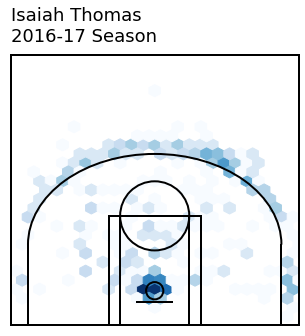

In [59]:
# Create figure and axes
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])

# Plot hexbin of shots
ax.hexbin(shot_data['LOC_X'], shot_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')

# Draw court
ax = create_court(ax, 'black')

# Annotate player name and season
ax.text(0, 1.05, 'Isaiah Thomas\n2016-17 Season', transform=ax.transAxes, ha='left', va='baseline')

# Save and show figure
# plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()